# MNIST - Neural Networks
#### Blidea Tudorel Alexandru
#### Prof. Coordonator: Brehar Raluca

In this notebook, I will try to train a Convolutional Neural Network, as simple as possible (without normalizing or using fancy activation function). This is pureley for educative purpose, and the layer weights and biases will be used to implement a dedicated CNN on FPGA.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
import tensorflow_datasets as tfds

In [ ]:
tf.__version__

'2.9.2'

In [ ]:
tf.random.set_seed(42)

Firstly, I will import the `MNIST` dataset, splited for train and test, with the labels for training.

In [ ]:
(ds_train, ds_test), ds_info = tfds.load('mnist', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)

As we can see below, we have *60000* examples for training, and *10000* for test.

In [ ]:
ds_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

The `MNIST` dataset is 28x28 pixels

In [ ]:
ds_train

<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
normalizationCt = 1.0 # For now, I won't normalize the dataset
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / normalizationCt, label

Preparing the dataset.

In [ ]:
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [ ]:
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
469/469 [==============================] - 9s 9ms/step - loss: 1.2678 - sparse_categorical_accuracy: 0.8630 - val_loss: 0.3049 - val_sparse_categorical_accuracy: 0.9214
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2364 - sparse_categorical_accuracy: 0.9383 - val_loss: 0.2317 - val_sparse_categorical_accuracy: 0.9369
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1470 - sparse_categorical_accuracy: 0.9579 - val_loss: 0.2093 - val_sparse_categorical_accuracy: 0.9442
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9664 - val_loss: 0.1886 - val_sparse_categorical_accuracy: 0.9514
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0960 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.1680 - val_sparse_categorical_accuracy: 0.9582
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0846 - sparse_categorica

Quite impressive to have an accuracy of 96.08% from the first try. But what if we had a simple model, with only one hidden layer?

In [ ]:
loss, accuracy = model.evaluate(ds_test)
print(f"loss: {loss}, accuracy: {accuracy}")

79/79 [==============================] - 0s 3ms/step - loss: 0.1802 - sparse_categorical_accuracy: 0.9608
loss: 0.18020294606685638, accuracy: 0.9607999920845032


In [ ]:
tf.random.set_seed(42)

In [ ]:
simple_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

In [ ]:
simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
simple_model.fit(ds_train, epochs=10, validation_data=ds_test)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 4.5090 - sparse_categorical_accuracy: 0.8670 - val_loss: 1.1217 - val_sparse_categorical_accuracy: 0.8917
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.6564 - sparse_categorical_accuracy: 0.9082 - val_loss: 0.5375 - val_sparse_categorical_accuracy: 0.9074
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3469 - sparse_categorical_accuracy: 0.9280 - val_loss: 0.4438 - val_sparse_categorical_accuracy: 0.9212
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2411 - sparse_categorical_accuracy: 0.9427 - val_loss: 0.3918 - val_sparse_categorical_accuracy: 0.9331
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1905 - sparse_categorical_accuracy: 0.9526 - val_loss: 0.3272 - val_sparse_categorical_accuracy: 0.9413
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1646 - sparse_categorica

In [ ]:
simple_loss, simple_accuracy = simple_model.evaluate(ds_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.2927 - sparse_categorical_accuracy: 0.9519


This difference is less than 1%, don't think is worthing to have add 2 layers for that. (Talking about a FPGA).

In [ ]:
print(f"accuracy difference: {(accuracy - simple_accuracy) * 100:0.2f}%")

accuracy difference: 0.89%


Now, let's se the CNN in action. First, I will plot the digits to see them, then

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
def getClass(prediction):
  """ I will enumerate the prediction, find the maximum by the score, and then get the index which represents the predicted digit in image. """
  return max(list(enumerate(prediction)), key=lambda x: x[1])[0]

In [ ]:
(train_images, train_labels) = datasets.mnist.load_data()
train_images = train_images[0]

[]

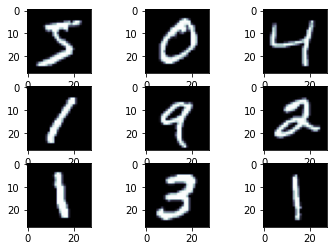

In [ ]:
rows = 3
columns = 3
fig, axs = plt.subplots(rows, columns)
for i in range(rows):
  for j in range(columns):
    axs[i, j].imshow(train_images[i * rows + j], cmap="bone")
plt.plot()

In [ ]:
predictions = model.predict(train_images)

1875/1875 [==============================] - 4s 2ms/step


Seems right, as it is in the above image.

In [ ]:
predicted_digits = []
for i in range(rows):
  for j in range(columns):
    predicted_digits.append(getClass(predictions[i * rows + j]))
print(", ".join(map(str, predicted_digits)))

5, 0, 4, 1, 9, 2, 1, 3, 1


Let's see what we had there.

In [ ]:
print(f"The actual digits are: {list(datasets.mnist.load_data()[0][1])[0:9]}")

The actual digits are: [5, 0, 4, 1, 9, 2, 1, 3, 1]


Check automatically if everything is right. Seems right for the first 9 digits.

In [ ]:
predicted_digits == list(datasets.mnist.load_data()[0][1])[0:9]

True